<h3>Code to generate figures for paper <br>
<i>Reaction-drift-diffusion models from master equations: application to material defects</i></h3>

Examples can be run in this notebook or exported

More information on atomic sampling scheme `TAMMBER` at [tomswinburne.github.io](tomswinburne.github.io)

(c) TD Swinburne, CNRS / CINaM, 2021 

Run the following cell to install required packages, if you don't have them:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import sys
from helper_scripts import generate_random_blocks, bloch_spectrum, coarse_grain, plot_model, plot_spectrum_3d, plot_spectrum
my_cmap = 'plasma'

## Simple mixing case, $P=1$

/home/swinburne/Code/ReactionDiffusion/helper_scripts.py:371: RuntimeWarning: divide by zero encountered in log
  lrM = np.where(np.abs(rM)<=1e-13,np.nan,-np.log(rM))
/home/swinburne/Code/ReactionDiffusion/helper_scripts.py:371: RuntimeWarning: invalid value encountered in log
  lrM = np.where(np.abs(rM)<=1e-13,np.nan,-np.log(rM))


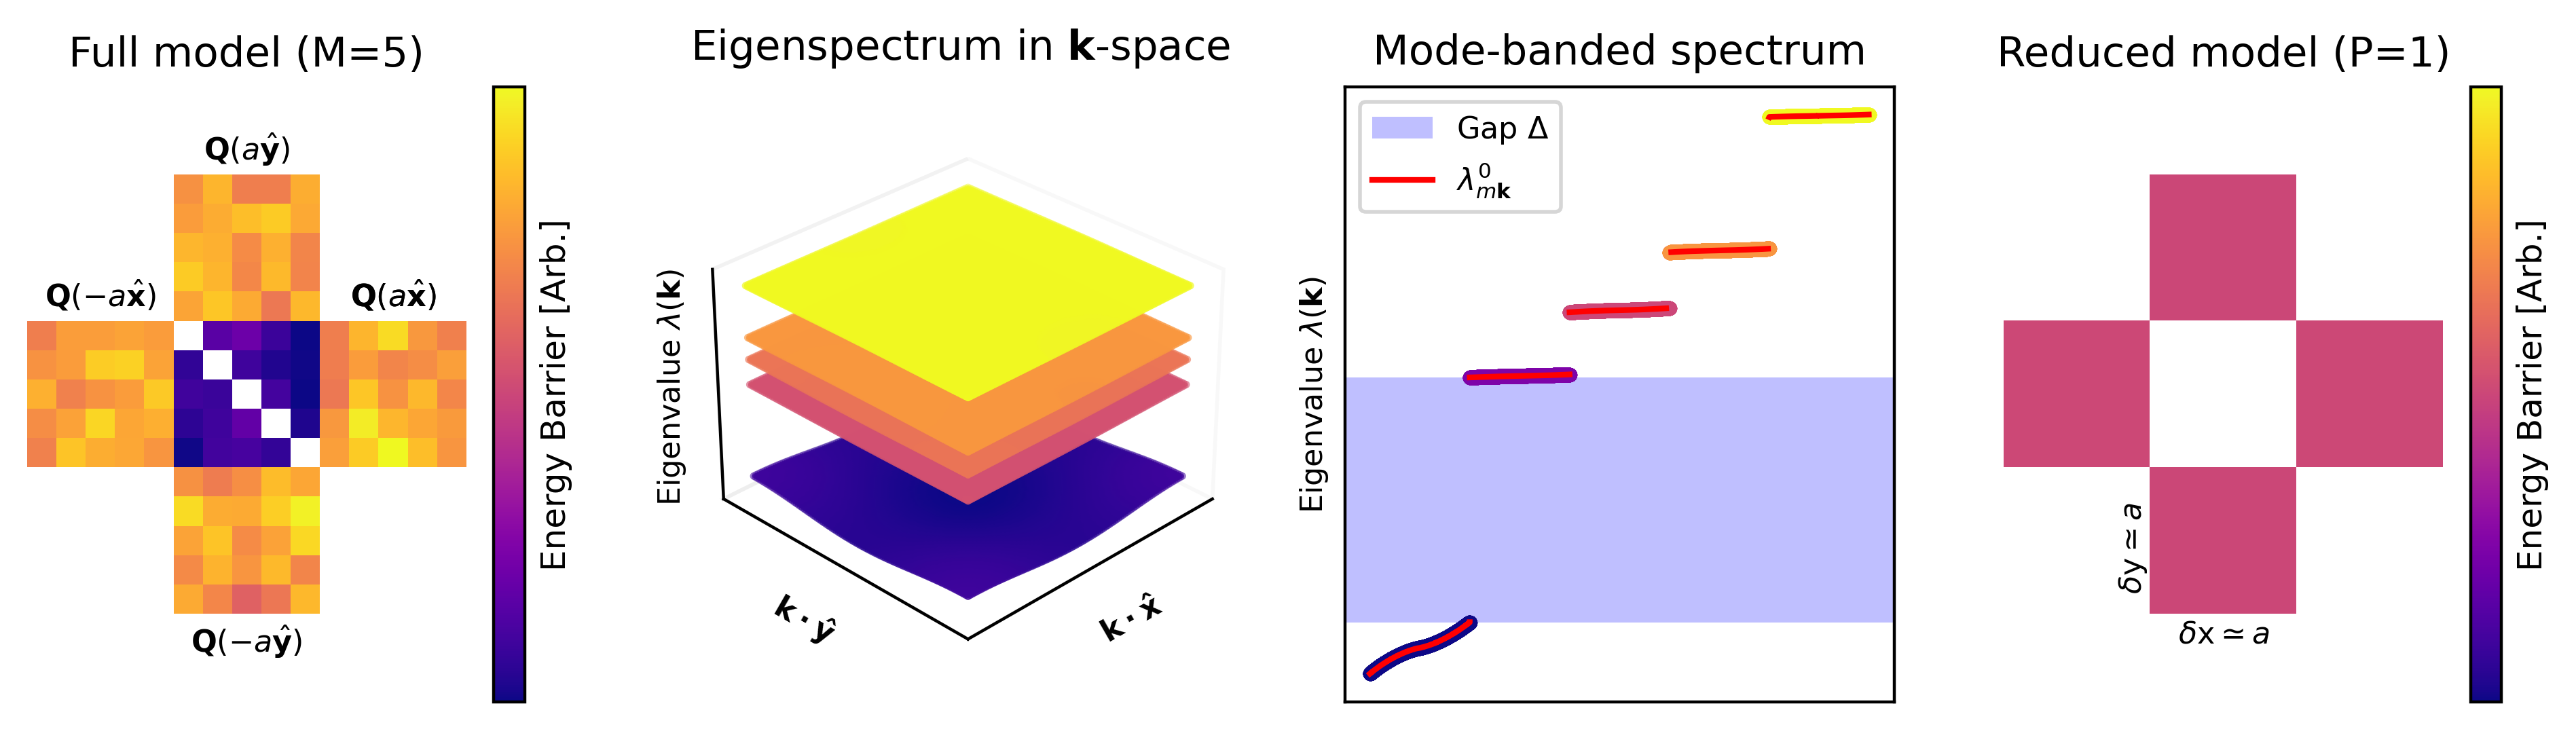

In [2]:
N = 5
rN = 1
l_homog = 1 # homogenization length scale

C,L,R,model_matrix,pi = generate_random_blocks(N=N,std_min=1.3, # 
                                    mean_bar=[2.0,5.0,5.0],std_bar=1.5,connectivity=N)


ev_data = bloch_spectrum(C,L,R,Bx=101)
reduced_model_matrix,approx_ev_data = coarse_grain(C,L,R,ev_data,reduced_modes=rN)

# plot model
fig = plt.figure(dpi=400,figsize=(12,3))
fig.patch.set_facecolor('white')
ax = fig.add_subplot(141)
ax.set_title(r"Full model (M=%d)" % N ,fontsize=11,pad=12)
lims = plot_model(fig,ax,model_matrix,my_cmap=my_cmap)

ax.text(1.4*N,-1.0,r"$\mathbf{Q}(a\hat{\mathbf{y}})$" ,fontsize=8,ha='center',color='k')
ax.text(2.4*N,-1.0+N,r"$\mathbf{Q}(a\hat{\mathbf{x}})$" ,fontsize=8,ha='center',color='k')

ax.text(1.4*N,+0.8+3*N,r"$\mathbf{Q}(-a\hat{\mathbf{y}})$" ,fontsize=8,ha='center',color='k')
ax.text(2.4*N,-1.0+N,r"$\mathbf{Q}(a\hat{\mathbf{x}})$" ,fontsize=8,ha='center',color='k')
ax.text(0.4*N,-1.0+N,r"$\mathbf{Q}(-a\hat{\mathbf{x}})$" ,fontsize=8,ha='center',color='k')




# plot 3D eigenspectrum 
ax = fig.add_subplot(142,projection='3d')
ax.set_title(r"Eigenspectrum in $\mathbf{k}$-space",fontsize=11,pad=16)
plot_spectrum_3d(fig,ax,ev_data.real,my_cmap=my_cmap)

# plot mode-banded spectrum
ax = fig.add_subplot(143)
ax.set_title(r"Mode-banded spectrum",fontsize=11)#,pad=8)
plot_spectrum(fig,ax,ev_data,approx_ev_data,
              my_cmap=my_cmap,plot_approx=2,
              plot_ksel=False,l_homog=l_homog,
              show_band_gap=rN,band_key=False)

# plot reduced model
ax = fig.add_subplot(144)
ax.set_title(r"Reduced model (P=%d)" % rN ,fontsize=11,pad=12)
plot_model(fig,ax,reduced_model_matrix,my_cmap=my_cmap,lim=lims)
ax.text(1.0,2.7,r"$\delta{\rm x}\simeq{a}$" ,fontsize=8,ha='center',color='k')

ax.text(0.38,2.05,r"$\delta{\rm y}\simeq{a}$",fontsize=8,ha='center',va='center',color='k',rotation=90);

plt.savefig("model_0.png",bbox_inches='tight')




## Anisotropic diffusion, $P=1$

/home/swinburne/Code/ReactionDiffusion/helper_scripts.py:371: RuntimeWarning: divide by zero encountered in log
  lrM = np.where(np.abs(rM)<=1e-13,np.nan,-np.log(rM))
/home/swinburne/Code/ReactionDiffusion/helper_scripts.py:371: RuntimeWarning: invalid value encountered in log
  lrM = np.where(np.abs(rM)<=1e-13,np.nan,-np.log(rM))


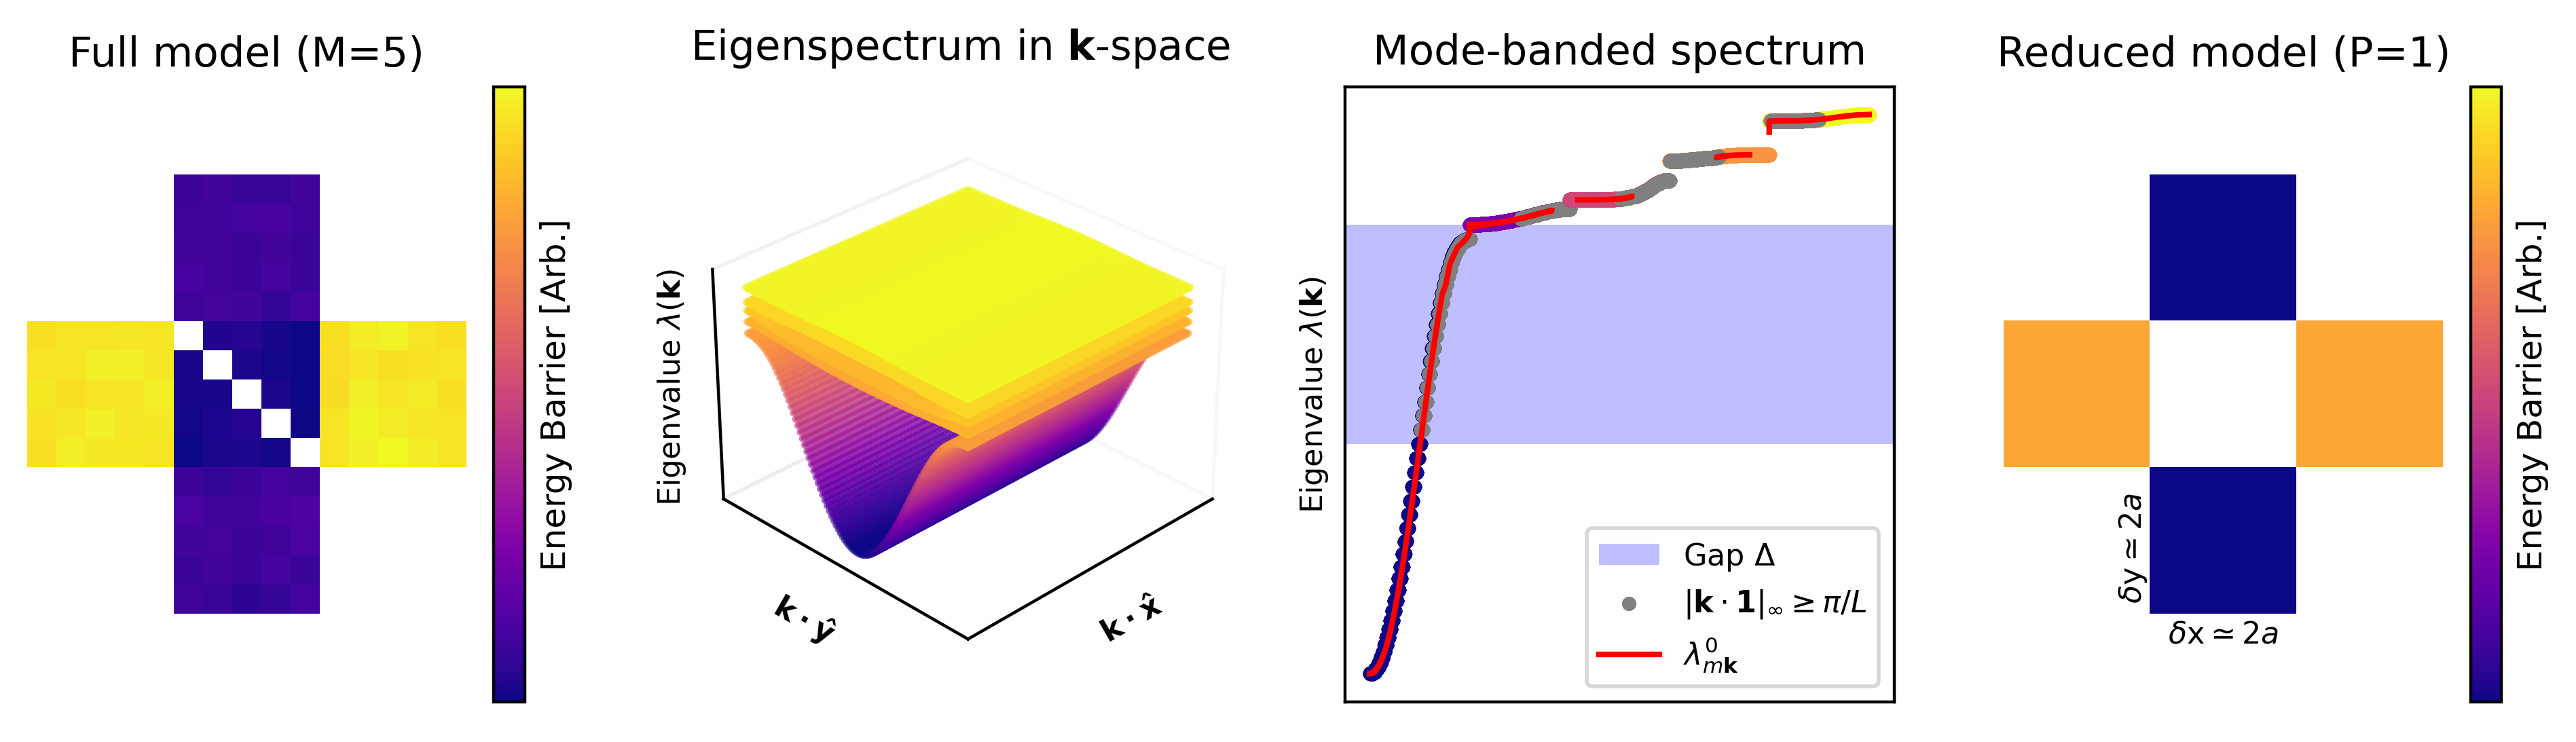

In [3]:
N = 5 # total number of states
rN = 1 # retained modes
l_homog = 2 # homogenization length scale

C,L,R,model_matrix,pi = generate_random_blocks(N=N,std_min=0.5,mean_bar=[1.0,10.0,1.0],std_bar=0.5,connectivity=N)

ev_data = bloch_spectrum(C,L,R,Bx=101)
reduced_model_matrix,approx_ev_function = coarse_grain(C,L,R,ev_data,reduced_modes=rN)

# plot model
fig = plt.figure(dpi=400,figsize=(12,3))
fig.patch.set_facecolor('white')
ax = fig.add_subplot(141)
ax.set_title(r"Full model (M=%d)" % N ,fontsize=11,pad=12)
lims = plot_model(fig,ax,model_matrix,my_cmap=my_cmap)

# plot 3D eigenspectrum 
ax = fig.add_subplot(142,projection='3d')
ax.set_title(r"Eigenspectrum in $\mathbf{k}$-space",fontsize=11,pad=16)
plot_spectrum_3d(fig,ax,ev_data.real,my_cmap=my_cmap)

# plot mode-banded spectrum
ax = fig.add_subplot(143)
ax.set_title(r"Mode-banded spectrum",fontsize=11)#,pad=8)
plot_spectrum(fig,ax,ev_data,approx_ev_function,
              my_cmap=my_cmap,plot_approx=2,
              plot_ksel=True,l_homog=l_homog,
              show_band_gap=rN,band_key=False)


# plot reduced model
ax = fig.add_subplot(144)
ax.set_title(r"Reduced model (P=%d)" % rN ,fontsize=11,pad=12)
plot_model(fig,ax,reduced_model_matrix,my_cmap=my_cmap,lim=lims)

# add labels
ax.text(1.0,2.7,r"$\delta{\rm x}\simeq{%da}$" % l_homog,fontsize=8,ha='center',color='k')
ax.text(0.38,2.05,r"$\delta{\rm y}\simeq{%da}$" % l_homog,fontsize=8,ha='center',va='center',color='k',rotation=90);

# save
plt.savefig("model_1.png",bbox_inches='tight')

## Anisotropic, multi-basin diffusion $P=2$

/home/swinburne/miniconda3/lib/python3.8/site-packages/msmtools/analysis/dense/pcca.py:284: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))
/home/swinburne/Code/ReactionDiffusion/helper_scripts.py:371: RuntimeWarning: divide by zero encountered in log
  lrM = np.where(np.abs(rM)<=1e-13,np.nan,-np.log(rM))
/home/swinburne/Code/ReactionDiffusion/helper_scripts.py:371: RuntimeWarning: invalid value encountered in log
  lrM = np.where(np.abs(rM)<=1e-13,np.nan,-np.log(rM))


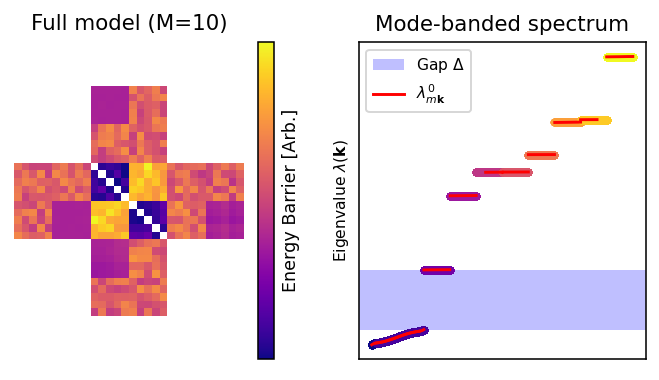

In [140]:
N = 10
rN = 2
C,L,R,model_matrix,pi = generate_random_blocks(N=N,
                                    std_min=1.2,
                                    mean_bar=[0.5,6.,6.],
                                    std_bar=3.4,
                                    connectivity=N,
                                    sub_basin=True,
                                    sub_basin_size=N//2,
                                    sub_basin_height=.0,
                                    sub_basin_barrier=10.0,
                                    sub_basin_aniso=True,
                                    sub_basin_migration=3.0,
                                    seed = 250
                                   )

ev_data = bloch_spectrum(C,L,R,Bx=101)

reduced_model_matrix,approx_ev_function,rQ = coarse_grain(C,L,R,ev_data,reduced_modes=rN,return_Q=True,pi=pi)


fig = plt.figure(dpi=140,figsize=(9,3))
fig.patch.set_facecolor('white')
ax = fig.add_subplot(131)
ax.set_title(r"Full model (M=%d)" % N ,fontsize=11,pad=12)
lims = plot_model(fig,ax,model_matrix,my_cmap=my_cmap)

# plot mode-banded spectrum
ax = fig.add_subplot(132)
ax.set_title(r"Mode-banded spectrum",fontsize=11)#,pad=8)
plot_spectrum(fig,ax,ev_data,approx_ev_function,
              my_cmap=my_cmap,plot_approx=2,
              plot_ksel=False,l_homog=1,
              show_band_gap=rN,band_key=False)


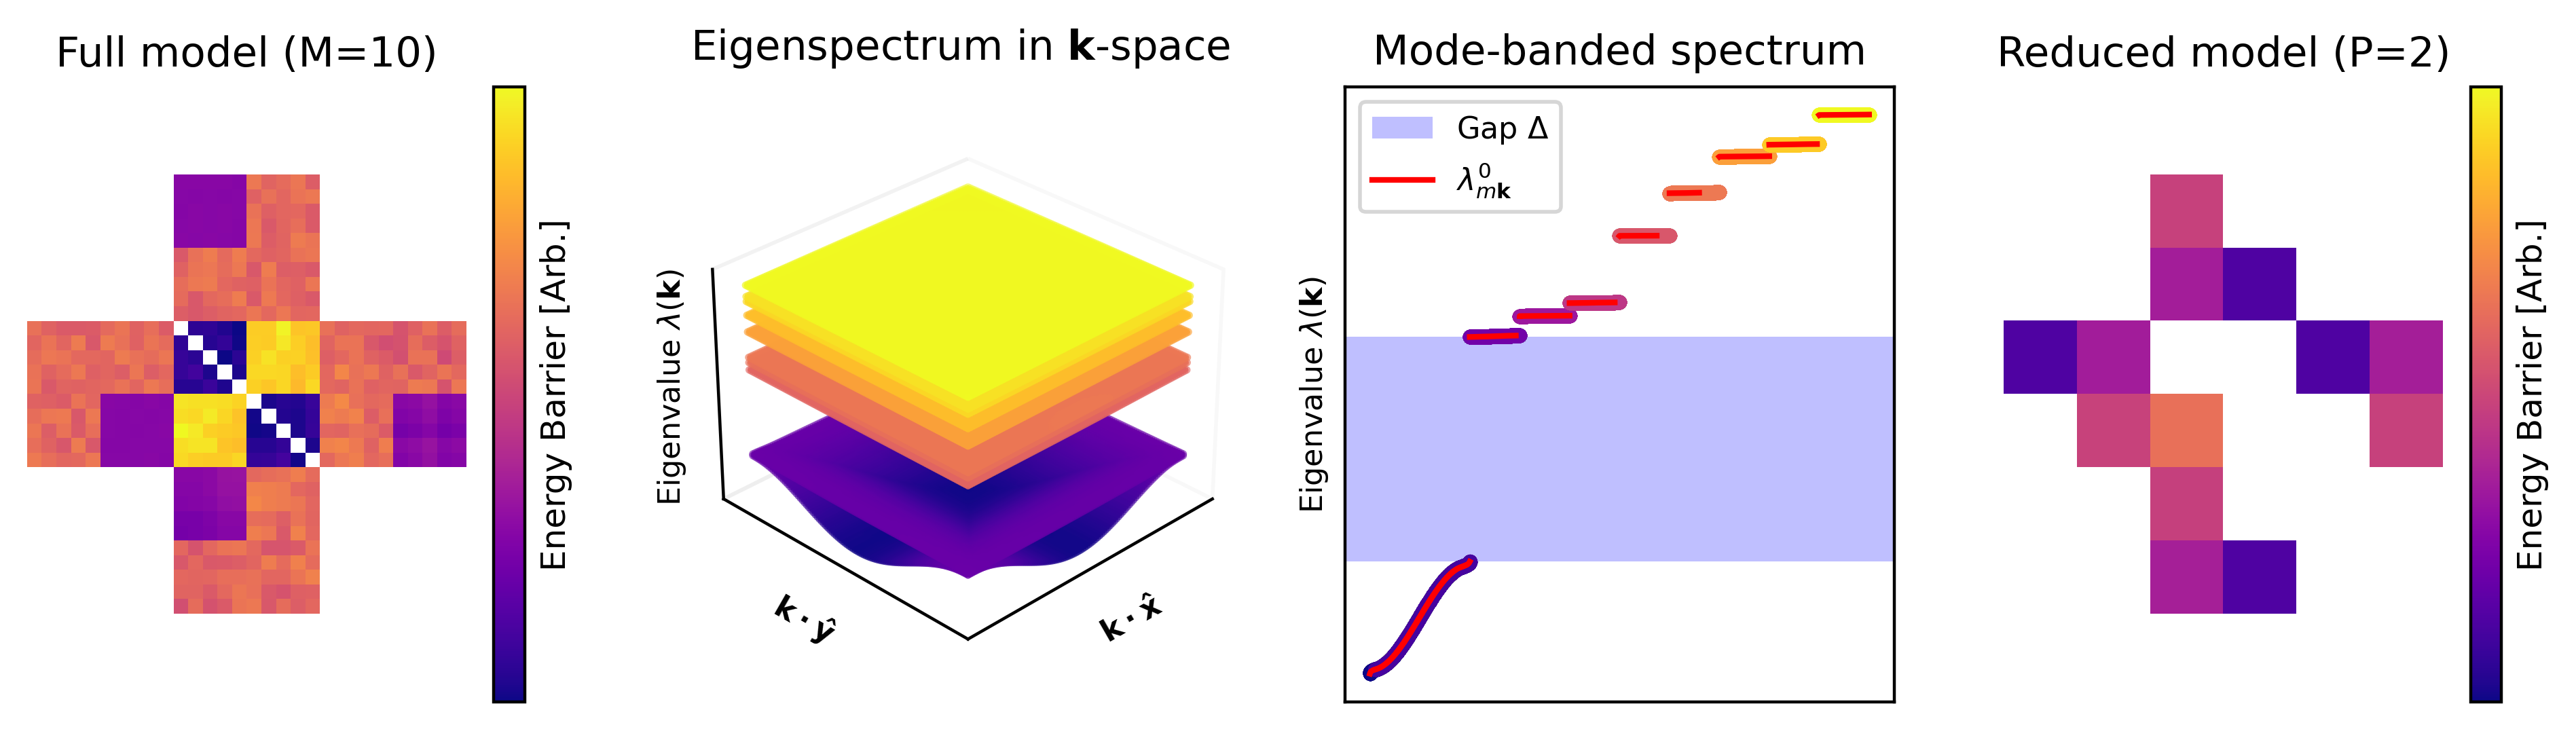

In [134]:
# plot model
fig = plt.figure(dpi=400,figsize=(12,3))
fig.patch.set_facecolor('white')
ax = fig.add_subplot(141)
ax.set_title(r"Full model (M=%d)" % N ,fontsize=11,pad=12)
lims = plot_model(fig,ax,model_matrix,my_cmap=my_cmap)

# plot 3D eigenspectrum 
ax = fig.add_subplot(142,projection='3d')
ax.set_title(r"Eigenspectrum in $\mathbf{k}$-space",fontsize=11,pad=16)
plot_spectrum_3d(fig,ax,ev_data.real,my_cmap=my_cmap)

# plot mode-banded spectrum
ax = fig.add_subplot(143)
ax.set_title(r"Mode-banded spectrum",fontsize=11)#,pad=8)
plot_spectrum(fig,ax,ev_data,approx_ev_function,
              my_cmap=my_cmap,plot_approx=2,
              plot_ksel=False,l_homog=1,
              show_band_gap=rN,band_key=False)

# plot reduced model
ax = fig.add_subplot(144)
ax.set_title(r"Reduced model (P=%d)" % rN ,fontsize=11,pad=12)
plot_model(fig,ax,reduced_model_matrix,my_cmap=my_cmap,lim=lims)

plt.savefig("model_2.png",bbox_inches='tight')

In [138]:
print(rQ[:2,2:4])
print(rQ[4:,2:4])

print(rQ.T[:2,2:4])
print(rQ.T[4:,2:4])

[[ 0.01888525 -0.02122078]
 [ 0.05466641  0.64621919]]
[[ 0.01943669 -0.01631588]
 [ 0.04991657  0.64566775]]
[[ 0.65484149 -0.02345215]
 [ 0.05957997  0.01704147]]
[[ 0.65373064 -0.01388381]
 [ 0.04969927  0.01815232]]


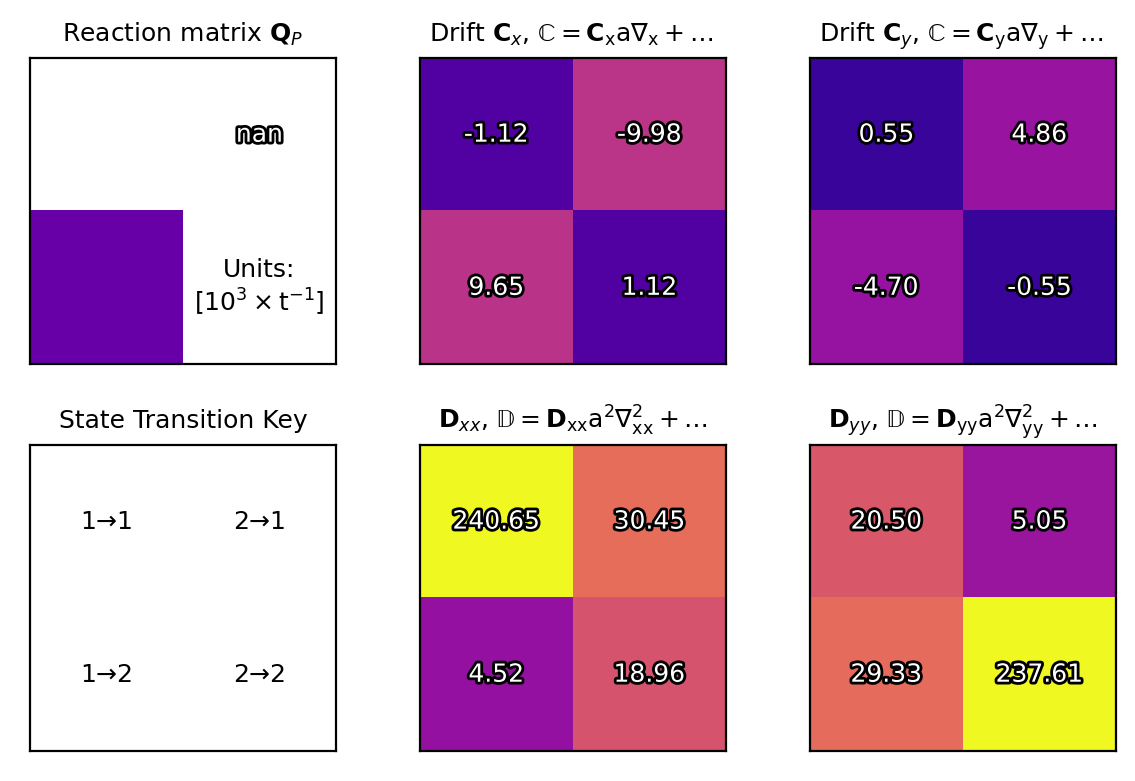

In [141]:
def plot_rates(fig,ax,M,my_cmap = 'cividis',lim=None,cb=False,fontsize=9):
    sel = (~np.isnan(M))
    if lim is None:
        lim = [M[sel].min(),M[sel].max()]
    im = ax.matshow(np.log(np.abs(M)+1.0),cmap=plt.get_cmap(my_cmap),vmin=lim[0],vmax=lim[1])
    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            if not np.isnan(M[i][j]):
                txt = ax.text(i,j,"%.2f" % M[j][i],ha='center',va='center',color='white',fontsize=fontsize)
                txt.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='k')])
    if cb:
        cbar = fig.colorbar(im)
        cbar.set_ticks([lim[0],lim[1]])
        cbar.ax.tick_params(labelsize=7)
        cbar.set_label('Transition Rate [Inverse Time]',fontsize=9)
    #ax.set_axis_off()
    ax.set_xticks([])
    ax.set_yticks([])
    return lim


C = (rQ[rN:2*rN,rN:2*rN]-np.diag(np.diag(rQ[rN:2*rN,rN:2*rN])))*1000

rCx = (rQ[rN:2*rN,2*rN:]-rQ[rN:2*rN,:rN])*1000
rDx = (rQ[rN:2*rN,2*rN:]+rQ[rN:2*rN,:rN])*1000 / 2.0
rCy = (rQ.T[rN:2*rN,2*rN:]-rQ.T[rN:2*rN,:rN]).T*1000
rDy = (rQ.T[rN:2*rN,2*rN:]+rQ.T[rN:2*rN,:rN]).T*1000 / 2.0

#rCy = (rQ[2*rN:,rN:2*rN]-rQ[:rN,rN:2*rN])*1000
rDy = (rQ[2*rN:,rN:2*rN]+rQ[:rN,rN:2*rN])*1000 / 2.0

#lim = max(np.abs(rCx).max(),C.max())*2.0
lim = np.log(np.abs(rDx.max()))

fig = plt.figure(dpi=200,figsize=(6,4))
fig.patch.set_facecolor('white')


ax = fig.add_subplot(231)
ax.set_title(r"Reaction matrix $\mathbf{Q}_P$",fontsize=9)
plot_rates(fig,ax,np.where(C>1e-12,C,np.nan),my_cmap=my_cmap,lim=[0,lim],cb=False)
txt = ax.text(rN*0.5,rN*0.5,"Units:\n"r"[$10^3\times$t$^{-1}$]",ha='center',va='center',color='black',fontsize=9)


ax = fig.add_subplot(232)
ax.set_title("Drift "r"${\bf C}_{x}$, $\rm\mathbb{C}={\bf C}_{x}a\nabla_x+\dots$ ",fontsize=9)
plot_rates(fig,ax,rCx,my_cmap=my_cmap,lim=[0,lim],cb=False)

ax = fig.add_subplot(233)
ax.set_title(r"Drift ${\bf C}_{y}$, $\rm\mathbb{C}={\bf C}_{y}a\nabla_y+\dots$ ",fontsize=9)
plot_rates(fig,ax,rCy,my_cmap=my_cmap,lim=[0,lim],cb=False)


ax = fig.add_subplot(234)
ax.set_title(r"State Transition Key",fontsize=9)
#ax.set_title(r"Reduced model (P=%d)" % rN ,fontsize=9)
plot_rates(fig,ax,rCy*np.nan,my_cmap=my_cmap,lim=[0,lim],cb=False)
txt = ax.text(0,0,r"$1\to1$",ha='center',va='center',color='black',fontsize=9)
txt = ax.text(1,0,r"$2\to1$",ha='center',va='center',color='black',fontsize=9)
txt = ax.text(0,1,r"$1\to2$",ha='center',va='center',color='black',fontsize=9)
txt = ax.text(1,1,r"$2\to2$",ha='center',va='center',color='black',fontsize=9)

#plot_model(fig,ax,reduced_model_matrix,my_cmap=my_cmap,lim=lims)

ax = fig.add_subplot(235)
ax.set_title(r"${\bf D}_{xx}$, $\rm\mathbb{D}={\bf D}_{xx}a^2\nabla^2_{xx}+\dots$",fontsize=9)
plot_rates(fig,ax,rDx,my_cmap=my_cmap,lim=[0,lim],cb=False)


ax = fig.add_subplot(236)
ax.set_title(r"${\bf D}_{yy}$, $\rm\mathbb{D}={\bf D}_{yy}a^2\nabla^2_{yy}+\dots$",fontsize=9)
plot_rates(fig,ax,rDy,my_cmap=my_cmap,lim=[0,lim],cb=False)

plt.tight_layout()
plt.savefig("model_2_terms.png",bbox_inches='tight')
